# Laborator 3 - regresia liniara

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:

def load_dataset(file_name):
    """ 
    Reads the CSV file and forms the numpy matrix of m rows and n cols
    
    file_name (string): the name of the file
    
    returns: the dataset as a numpy matrix
    """
    
#     matrix = np.array([])
#     with open(file_name, newline='') as csvfile:
#         csvreader = csv.reader(csvfile)
#         for row in csvreader:
#             matrix = np.append(matrix, row)

    return pd.read_csv(file_name).values

In [3]:
def form_x_and_y(x):
    """
    From the given input matrix, construct the X and Y; Y is a single column
    
    x: the read matrix
    y: the real values provided in the last column of x
    
    returns: a tuple x ndarray(506, 13), y ndarray(506,) 
    """    
    return x[:, :-1], x[:, -1:]

In [4]:
def normalize(x):
    """
    From each element, subtract the minimum on its column, 
    then divide by the difference between its maximum and minimum (both
    on its column)
    
    x: the matrix X
    
    returns: the scaled matrix
    """
    # ... put your code here ...
    min_arr = np.amin(x, axis=0)[np.newaxis, :]
    ptp_arr = np.ptp(x, axis=0)[np.newaxis, :]
    
    return (x - min_arr) / ptp_arr

In [5]:
def add_front_ones_column(x):
    """
    Changes the shape of X by adding a front column of ones.
    
    x: the matrix X
    
    returns: the transformed matrix
    """
    return np.insert(x, 0, 1, axis=1)

In [6]:
def sgd(x, y, theta):
    """
    Computes the second term, the derivative of J.
    
    returns: the vector of computed deltas
    """
    
    return np.sum(x * (predict(x, theta) - y), axis=0).reshape(14, 1) / 506


def predict(x, theta):
    """
    Constructs the inner product between X and theta.
    
    returns: a vector of predicted y values
    """
    
    return x.dot(theta)


def cost(x, y, theta):
    """
    The cost function J. Calls predict()
    
    returns: a scalar
    """
    
    return np.sum((predict(x, theta) - y) ** 2) / 1012


def train(x, y, alpha = 0.01, iterations = 10000):
    """
    Iterates a specified number of times and adjusts thetas. Calls sgd() and cost().

    returns: the theta vector and the cost for each iteration, as vector
    
    """
    
    theta = np.random.rand(14, 1)
    values = np.array([])
    
    for i in range(iterations):
        theta_nou = theta - alpha * sgd(x, y, theta)
        
        
        if np.allclose(theta, theta_nou, atol=1e-10):
            break
        else:
            theta = theta_nou
            
        values = np.append(values, cost(x, y, theta_nou))
    
    return theta, values

In [7]:
# load the dataset
dataset = load_dataset('housing.csv')

# from the dataset read, construct the X and Y matrices
x, y = form_x_and_y(dataset)
assert np.shape(x)[0] == 506
assert np.shape(x)[1] == 13
assert np.shape(y)[0] == 506
assert np.shape(y)[1] == 1

# do the normalization
x = normalize(x)
assert np.all(np.logical_and(x >= 0, x <= 1))

# add columns of ones, taking initial and final shapes
initial_shape = np.shape(x)
x = add_front_ones_column(x)
final_shape = np.shape(x)

# check that the shape evolved the right way
assert np.all(np.array(initial_shape) + np.array([0, 1]) == np.array(final_shape))
assert np.all(x[:, 0] == 1)

print('ALL OK')

ALL OK


In [11]:
# do the training
theta, values = train(x, y,alpha=0.11, iterations=100000)


10.947480400876142


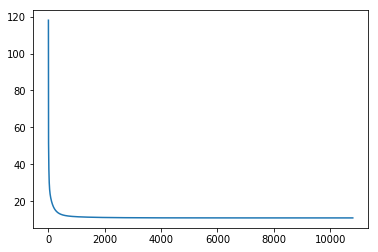

In [12]:
print(values[-1])

i = range(0, len(values))
plt.plot(i, values)
plt.show()

In [13]:
# compare with scikit implementation of regression 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(x, y)
y_pred = linreg.predict(x)

rss = sum((y_pred - y)**2)
print(sum((predict(x, theta) - y)**2) - rss)

assert(sum((predict(x, theta) - y)**2) - rss) < 1e-1
print('All OK')

[0.10213874]


AssertionError: 

In [27]:
# directly compute theta using pseudoinverse
theta_direct = np.dot(np.linalg.pinv(x.T @ x) @ x.T, y)

In [28]:
# this method should give better predictions
assert(sum((predict(x, theta_direct) - y)**2) - rss) < 1e-10
print("All ok")

All ok


In [29]:
m = np.shape(x)[0]
perm = np.arange(m)
np.random.shuffle(perm)

# 354 e 70% din 506
# ... put your code here ...

x_train = x[perm[:354]]
x_test = x[perm[354:]]
y_train = y[perm[:354]]
y_test = y[perm[354:]]

# after splitting to 70/30, check to ensure that no data has been lost
# be sure to split both the X and the Y with the same permutation
assert tuple([sum(i) for i in zip(np.shape(x_train), np.shape(x_test))]) == (506, 28)
assert tuple([sum(i) for i in zip(np.shape(y_train), np.shape(y_test))]) == (506, 2)

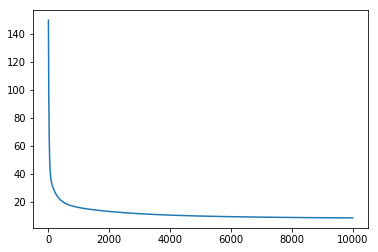

In [30]:
# compute again the thetas
theta, values = train(x_train, y_train, alpha=0.01)

i = range(0, len(values))
plt.plot(i, values)
plt.show()

In [31]:
# show the obtained costs
cost(x_train, y_train, theta), cost(x_test, y_test, theta)

(8.312734430866076, 4.093546624529517)